# Web Scraping with Beautiful Soup
* Data extraction from the web
* Data manipulation and cleaning
* Data visualization

## Questions for 10K race for Lilac Run
* What was the average finish time for runners?
* Did the runner's finish time follow a normal distribution?
* Were there any performance differences between males and females of various age groups?

## Data extraction from the web

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
# Specify url cointaining dataset and get the html of page
url = 'https://www.hubertiming.com/results/2022Lilac10K'

html = urlopen(url)

In [3]:
# Create a beautiful soup object from html
soup = BeautifulSoup(html, 'lxml')
display(type(soup))
print(soup.prettify())

bs4.BeautifulSoup

<!DOCTYPE html>
<html>
 <head>
  <meta content="Race results for the 2022 Gresham Lilac Run!" property="og:title"/>
  <meta content="Results of the 2022 Gresham Lilac Run at Main City Park in Gresham, US" property="og:description"/>
  <meta content="https://www.hubertiming.com/results/2020Lilac.png" property="og:image"/>
  <meta content="https://www.hubertiming.com/results/2022Lilac10K" property="og:url"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <title>
   Race results for the 2022 Gresham Lilac Run!
  </title>
  <link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.2.1/css/bootstrap.min.css" rel="stylesheet"/>
  <link href="https://use.fontawesome.com/releases/v5.13.0/css/all.css" rel="stylesheet"/>
  <link href="//cdn.rawgit.com/noelboss/featherlight/1.7.11/release/featherlight.min.css" rel="stylesheet" type="text/css"/>
  <link href="//cdn.rawgit.com/noelboss/featherlight/1.7.11/release/featherlight.gal

In [4]:
# Get the title
title = soup.title
display(title)

<title>Race results for the 2022 Gresham Lilac Run!</title>

In [5]:
# Print the text output
text = soup.get_text()
display(soup.text)

"\n\n\n\n\n\n\nRace results for the 2022 Gresham Lilac Run!\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n 2022 Gresham Lilac Run 10K\n Main City Park, Gresham, US \n May 7th, 2022\r\n\r\n\r\n                            \n City of Gresham\n\n\n\n\n\n\n Email\r\n                        timing@hubertiming.com with results questions. Please include your bib number if you have it.\r\n                                 virtual result with verification\r\n\r\n\r\n                    \n\n\n\n\n\n\nHuber Timing Home\n\n\n\n\n\n10K:\n\n\nFinishers:\n106\n\n\nMale:\n33\n\n\nFemale:\n73\n\n\n\n\n\n\n\n\n\n 5K\n 10K\n Half\n 5K Virtual\n 10K Virtual\n 13.1 Virtual\n Summary\n Gallery\n\n\n\n\n\n\n\n10K Results\n\n\n\nSearch:\n\nSearch\nDivision:\n\nMen\nWomen\nNon Binary\nMasters Men\nMasters Women\nMasters Non Binary\nF 10-14\nF 20-24\nF 25-29\nF 30-34\nF 35-39\nF 40-44\nF 45-49\nF 50-54\nF 55-59\nF 60-64\nF 65-69\nF 70-74\nF 75-79\nM 15-19\nM 25-29\nM 30-34\nM 35-39\nM 40-44\nM 45-49\nM 50-54\nM 55-5

In [6]:
# extract html tags
soup.find_all('a')

[<a href="https://greshamoregon.gov/" target="_blank">City of Gresham</a>,
 <a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2022Lilac" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K</a>,
 <a class="btn btn-primary btn-lg" href="/results/2022LilacHalf" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> Half</a>,
 <a class="btn btn-primary btn-lg" href="/results/2022Lilac5KVirtual" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Virtual</a>,
 <a class="btn btn-primary btn-lg" href="/results/2022Lilac10KVirtual" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 10K Virtual</a>,
 <a class="btn btn-primary btn-lg" href="/results/2022LilacHalfVirtual" role="button" style="margin: 0px 0px

In [7]:
# Extract only hyperlinks
all_links = soup.find_all('a')
for link in all_links:
    print(link.get("href"))

https://greshamoregon.gov/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2022Lilac
/results/2022LilacHalf
/results/2022Lilac5KVirtual
/results/2022Lilac10KVirtual
/results/2022LilacHalfVirtual
/results/summary/2022Lilac10K
/results/gallery/2022Lilac10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [8]:
# Print out table rows only - first 10 rows
rows = soup.find_all('tr')
print(rows[:10])

[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>106</td>
</tr>, <tr>
<td>Male:</td>
<td>33</td>
</tr>, <tr>
<td>Female:</td>
<td>73</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>, <tr data-bib="305">
<td>1</td>
<td>305</td>
<td>

                    SCOTT OVERBY

                </td>
<td>M</td>
<td>39</td>
<td>SANDY</td>
<td>39:58</td>
<td>6:26</td>
<td>

                    1 of 33

                </td>
<td>M 35-39</td>
<td>

                    1 of 5

                </td>
<td>0:02</td>
<td>40:00</td>
</tr>, <tr data-bib="317">
<td>2</td>
<td>317</td>
<td>

                    PATRICE SAAD

                </td>
<td>M</td>
<td>44</td>
<td>WILSONVILLE</td>
<td>42:16</td>
<td>6:48</td>
<td>

                    2 of 33

                </td>
<td>M 

In [11]:
# Iterate over table rows and print cells of the rows
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

# Remove html tags and gets only text
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, 'lxml').get_text()
print(cleantext)
type(cleantext)

[<td>106</td>, <td>233</td>, <td>

                    EVETTE FARRA

                </td>, <td>F</td>, <td>52</td>, <td>BEAVERTON</td>, <td>1:58:07</td>, <td>19:02</td>, <td>

                    73 of 73

                </td>, <td>F 50-54</td>, <td>

                    4 of 4

                </td>, <td>0:23</td>, <td>1:58:30</td>]
[106, 233, 

                    EVETTE FARRA

                , F, 52, BEAVERTON, 1:58:07, 19:02, 

                    73 of 73

                , F 50-54, 

                    4 of 4

                , 0:23, 1:58:30]


str

In [10]:
# Iterate over table rows and create a list of table elements
list_rows = []

for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = BeautifulSoup(str_cells, 'lxml').get_text()
    list_rows.append(clean)
print(clean)
type(clean)

[106, 233, 

                    EVETTE FARRA

                , F, 52, BEAVERTON, 1:58:07, 19:02, 

                    73 of 73

                , F 50-54, 

                    4 of 4

                , 0:23, 1:58:30]


str

In [14]:
# Convert list to pandas dataframe
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 106]"
2,"[Male:, 33]"
3,"[Female:, 73]"
4,[]
5,"[1, 305, \r\n\r\n SCOTT OVE..."
6,"[2, 317, \r\n\r\n PATRICE S..."
7,"[3, 209, \r\n\r\n MICHAEL B..."
8,"[4, 279, \r\n\r\n LINDSAY L..."
9,"[5, 341, \r\n\r\n NICKE AND..."


## Data Manipulation and Cleaning

In [23]:
# Split the "0" column into multiple columns
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,[],None,None,None,None,None,None,None,None,None,None,None,None
1,[Finishers:,106],None,None,None,None,None,None,None,None,None,None,None
2,[Male:,33],None,None,None,None,None,None,None,None,None,None,None
3,[Female:,73],None,None,None,None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None,None,None,None
5,[1,305,\r\n\r\n SCOTT OVERBY\r\n\...,M,39,SANDY,39:58,6:26,\r\n\r\n 1 of 33\r\n\r\n ...,M 35-39,\r\n\r\n 1 of 5\r\n\r\n ...,0:02,40:00]
6,[2,317,\r\n\r\n PATRICE SAAD\r\n\...,M,44,WILSONVILLE,42:16,6:48,\r\n\r\n 2 of 33\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 7\r\n\r\n ...,0:02,42:18]
7,[3,209,\r\n\r\n MICHAEL BLACK\r\n...,M,57,WEST LINN,47:34,7:40,\r\n\r\n 3 of 33\r\n\r\n ...,M 55-59,\r\n\r\n 1 of 3\r\n\r\n ...,0:02,47:36]
8,[4,279,\r\n\r\n LINDSAY LINDALA\r...,F,36,GRESHAM,48:03,7:44,\r\n\r\n 1 of 73\r\n\r\n ...,F 35-39,\r\n\r\n 1 of 15\r\n\r\n ...,0:03,48:06]
9,[5,341,\r\n\r\n NICKE ANDERSON\r\...,M,30,DAMASCUS,48:47,7:52,\r\n\r\n 4 of 33\r\n\r\n ...,M 30-34,\r\n\r\n 1 of 5\r\n\r\n ...,0:06,48:53]


In [24]:
# Clean the dataframe
df1[0] = df1[0].str.strip('[]')
df1[1] = df1[1].str.strip('[]')
df1[2] = df1[2].str.replace('\r\n\r\n','')
df1[8] = df1[8].str.replace('\r\n\r\n','')
df1[9] = df1[9].str.replace('\r\n\r\n','')
df1[10] = df1[10].str.replace('\r\n\r\n','')
df1[12] = df1[12].str.strip('[]')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,106,None,None,None,None,None,None,None,None,None,None,None
2,Male:,33,None,None,None,None,None,None,None,None,None,None,None
3,Female:,73,None,None,None,None,None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None,None,None,None,None,None
5,1,305,SCOTT OVERBY,M,39,SANDY,39:58,6:26,1 of 33,M 35-39,1 of 5,0:02,40:00
6,2,317,PATRICE SAAD,M,44,WILSONVILLE,42:16,6:48,2 of 33,M 40-44,1 of 7,0:02,42:18
7,3,209,MICHAEL BLACK ...,M,57,WEST LINN,47:34,7:40,3 of 33,M 55-59,1 of 3,0:02,47:36
8,4,279,LINDSAY LINDALA ...,F,36,GRESHAM,48:03,7:44,1 of 73,F 35-39,1 of 15,0:03,48:06
9,5,341,NICKE ANDERSON ...,M,30,DAMASCUS,48:47,7:52,4 of 33,M 30-34,1 of 5,0:06,48:53


In [25]:
# Get all table headers
col_labels = soup.find_all('th')

# Extract text from html tags for table headers
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, Age, City, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time]']


In [26]:
# Convert the list to pandas dataframe
df2 = pd.DataFrame(all_header)
display(df2)

# Split the "0" column into multiple columns
df3 = df2[0].str.split(',', expand=True)
display(df3)

,0
0,"[Place, Bib, Name, Gender, Age, City, Chip Tim..."


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,[Place,Bib,Name,Gender,Age,City,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time]


In [28]:
# Join two dataframes vertically/ concatenated using concat()
frames = [df3, df1]

df4 = pd.concat(frames)
display(df4.head(10))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,[Place,Bib,Name,Gender,Age,City,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time]
0,,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,106,None,None,None,None,None,None,None,None,None,None,None
2,Male:,33,None,None,None,None,None,None,None,None,None,None,None
3,Female:,73,None,None,None,None,None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None,None,None,None,None,None
5,1,305,SCOTT OVERBY,M,39,SANDY,39:58,6:26,1 of 33,M 35-39,1 of 5,0:02,40:00
6,2,317,PATRICE SAAD,M,44,WILSONVILLE,42:16,6:48,2 of 33,M 40-44,1 of 7,0:02,42:18
7,3,209,MICHAEL BLACK ...,M,57,WEST LINN,47:34,7:40,3 of 33,M 55-59,1 of 3,0:02,47:36
8,4,279,LINDSAY LINDALA ...,F,36,GRESHAM,48:03,7:44,1 of 73,F 35-39,1 of 15,0:03,48:06


In [29]:
# Assign first row to be the table header
df5 = df4.rename(columns=df4.iloc[0])
display(df5.head())

,[Place,Bib,Name,Gender,Age,City,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time]
0,[Place,Bib,Name,Gender,Age,City,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time]
0,,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,106,None,None,None,None,None,None,None,None,None,None,None
2,Male:,33,None,None,None,None,None,None,None,None,None,None,None
3,Female:,73,None,None,None,None,None,None,None,None,None,None,None


In [30]:
# Get overview of the data
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 110
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   [Place            112 non-null    object
 1    Bib              110 non-null    object
 2    Name             107 non-null    object
 3    Gender           107 non-null    object
 4    Age              107 non-null    object
 5    City             107 non-null    object
 6    Chip Time        107 non-null    object
 7    Chip Pace        107 non-null    object
 8    Gender Place     107 non-null    object
 9    Age Group        107 non-null    object
 10   Age Group Place  107 non-null    object
 11   Time to Start    107 non-null    object
 12   Gun Time]        107 non-null    object
dtypes: object(13)
memory usage: 12.2+ KB


(112, 13)

In [31]:
# Drop rows with missing values
df6 = df5.dropna(axis=0, how='any')

In [32]:
# Drop row index 0
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,Age,City,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time]
5,1,305,SCOTT OVERBY,M,39,SANDY,39:58,6:26,1 of 33,M 35-39,1 of 5,0:02,40:00
6,2,317,PATRICE SAAD,M,44,WILSONVILLE,42:16,6:48,2 of 33,M 40-44,1 of 7,0:02,42:18
7,3,209,MICHAEL BLACK ...,M,57,WEST LINN,47:34,7:40,3 of 33,M 55-59,1 of 3,0:02,47:36
8,4,279,LINDSAY LINDALA ...,F,36,GRESHAM,48:03,7:44,1 of 73,F 35-39,1 of 15,0:03,48:06
9,5,341,NICKE ANDERSON ...,M,30,DAMASCUS,48:47,7:52,4 of 33,M 30-34,1 of 5,0:06,48:53


In [34]:
# Rename columns '[Place' and 'Team]'
df7.rename(columns={'[Place': 'Place'}, inplace=True)
df7.rename(columns={' Gun Time]': 'Gun Time'}, inplace=True)
df7.head()

,Place,Bib,Name,Gender,Age,City,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
5,1,305,SCOTT OVERBY,M,39,SANDY,39:58,6:26,1 of 33,M 35-39,1 of 5,0:02,40:00
6,2,317,PATRICE SAAD,M,44,WILSONVILLE,42:16,6:48,2 of 33,M 40-44,1 of 7,0:02,42:18
7,3,209,MICHAEL BLACK ...,M,57,WEST LINN,47:34,7:40,3 of 33,M 55-59,1 of 3,0:02,47:36
8,4,279,LINDSAY LINDALA ...,F,36,GRESHAM,48:03,7:44,1 of 73,F 35-39,1 of 15,0:03,48:06
9,5,341,NICKE ANDERSON ...,M,30,DAMASCUS,48:47,7:52,4 of 33,M 30-34,1 of 5,0:06,48:53


## Data Analysis and Visualization

##### What was the average finish time (in minutes) for the runners?

In [35]:
# Convert Chip Time to list
time_list = df7[' Chip Time'].str.strip().tolist()

# for loop to convert 'Chip Time' to minutes
time_mins = []
for i in time_list:
    if len(i) == 5: 
        m, s = i.split(':')
        math = (int(m) + int(s)/60)
    else:
        h, m, s = i.split(':')
        math = (int(h)*3600 + int(m)*60 + int(s))/60
    time_mins.append(math)
# print(time_mins)

In [36]:
# Convert the list to the dataframe
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,Age,City,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Runner_mins
5,1,305,SCOTT OVERBY,M,39,SANDY,39:58,6:26,1 of 33,M 35-39,1 of 5,0:02,40:00,39.966667
6,2,317,PATRICE SAAD,M,44,WILSONVILLE,42:16,6:48,2 of 33,M 40-44,1 of 7,0:02,42:18,42.266667
7,3,209,MICHAEL BLACK ...,M,57,WEST LINN,47:34,7:40,3 of 33,M 55-59,1 of 3,0:02,47:36,47.566667
8,4,279,LINDSAY LINDALA ...,F,36,GRESHAM,48:03,7:44,1 of 73,F 35-39,1 of 15,0:03,48:06,48.050000
9,5,341,NICKE ANDERSON ...,M,30,DAMASCUS,48:47,7:52,4 of 33,M 30-34,1 of 5,0:06,48:53,48.783333


In [37]:
# Calculate the statistics for only numeric columns
df7.describe(include=[np.number])

,Runner_mins
count,106.000000
mean,72.984748
std,17.143126
min,39.966667
25%,60.441667
50%,69.358333
75%,83.670833
max,118.116667


([<matplotlib.axis.XTick at 0x7ff5a32e6940>], [Text(1, 0, 'Runners')])

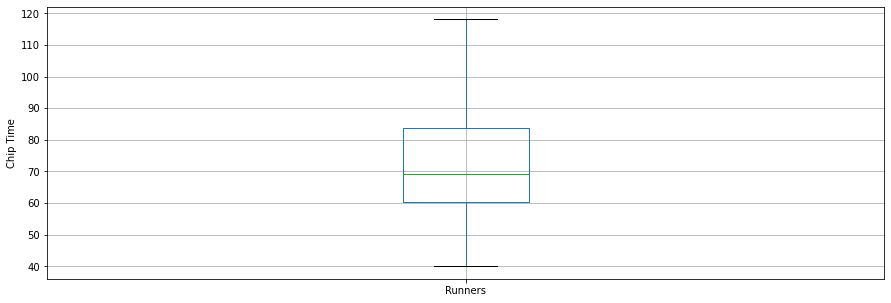

In [38]:
# Plot a box plot of Runner times
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

##### Did the runners' finish times follow a normal distribution?

/Users/robot/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


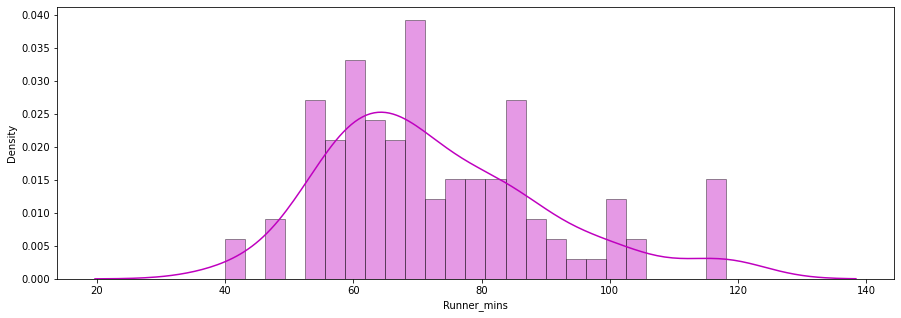

In [39]:
# Plot distribution of runners' chip times
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True,
                  rug=False, color='m', bins=25,
                 hist_kws={'edgecolor':'black'})
plt.show()

##### Were there any performance differences between males and females of various age groups?

/Users/robot/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/robot/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


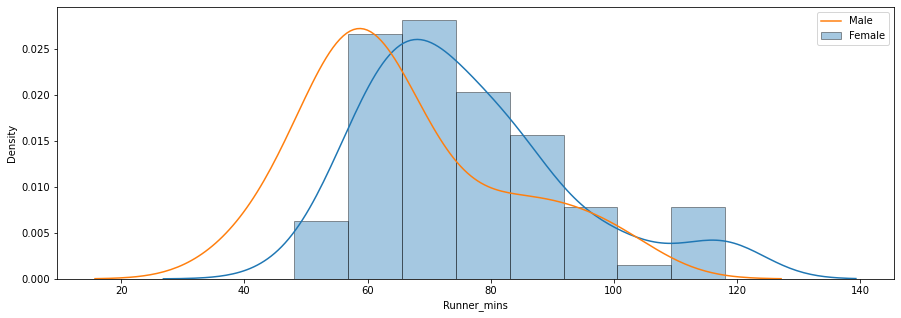

In [40]:
# Plot distribution of chip times for males and females
gender = df7[' Gender']
f_runner = df7.loc[gender == ' F']['Runner_mins']
m_runner = df7.loc[gender == ' M']['Runner_mins']

sns.distplot(f_runner, hist=True,
             kde=True, rug=False,
             hist_kws={'edgecolor':'black'},
             label='Female')
sns.distplot(m_runner, hist=False,
             kde=True, rug=False,
             hist_kws={'edgecolor':'black'},
             label='Male')
plt.legend()

In [41]:
# Calculate summary statistics for males and females
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                    \
              count       mean        std        min        25%   50%   
 Gender                                                                 
 F             73.0  76.186301  16.669327  48.050000  63.883333  71.4   
 M             33.0  65.902525  16.248337  39.966667  55.050000  61.1   

                                
               75%         max  
 Gender                         
 F       84.550000  118.116667  
 M       72.833333  102.950000  


Text(0.5, 0.98, '')

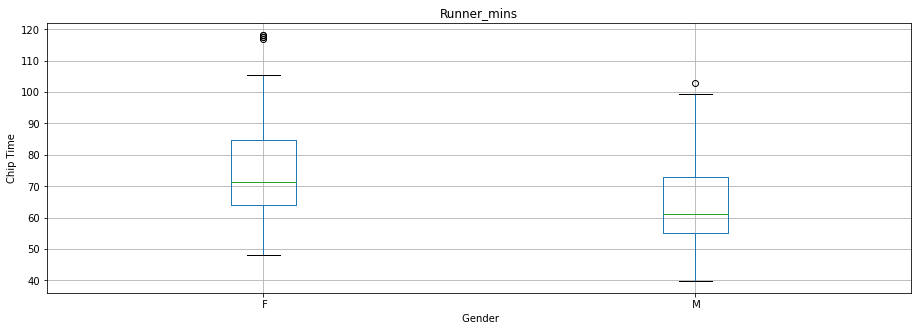

In [42]:
# Compare the male and female using boxplot
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")